## 244 - 1 Minute ASOS Data

[Youtube](https://www.youtube.com/watch?v=Do7ehn3aSN8)

[Download ASOS 1 minute interval data](https://mesonet.agron.iastate.edu/request/asos/1min.phtml)

1) Select Station: [XNA] NORTHWEST ARKANSAS REGIONAL APT

2) Timezone of Observations: UTC Time

3) Specific Start/End Time:
Start Date: 2022 August 2
End Date: 2022 August 5

4) Select Variables: All Variables

5) Data Sampling: Every Minute

6) How to view: Download to Disk

7) Data Delimitation: Comma

8) Include Station Latitude & Longitude Values: No

Submit Form: Process Data Request

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from metpy.units import units, pandas_dataframe_to_unit_arrays

In [2]:
df = pd.read_csv('XNA_ASOS_1_Minute.txt')
df.head()

,station,station_name,valid(UTC),tmpf,dwpf,sknt,drct,gust_drct,gust_sknt,vis1_coeff,...,vis2_coeff,vis2_nd,vis3_coeff,vis3_nd,ptype,precip,pres1,pres2,pres3,Unnamed: 20
0,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:00,88,65,8,213,199,11,0.05,...,NaN,NaN,NaN,NaN,NP,0.0,28.664,28.667,28.667,NaN
1,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:01,88,65,7,215,227,8,0.05,...,NaN,NaN,NaN,NaN,NP,0.0,28.665,28.668,28.667,NaN
2,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:02,88,66,6,216,206,8,0.05,...,NaN,NaN,NaN,NaN,NP,0.0,28.665,28.668,28.667,NaN
3,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:03,88,65,6,214,219,9,0.05,...,NaN,NaN,NaN,NaN,NP,0.0,28.665,28.668,28.667,NaN
4,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:04,88,66,7,214,210,10,0.05,...,NaN,NaN,NaN,NaN,NP,0.0,28.666,28.668,28.668,NaN


In [3]:
print(df.columns)
print(len(df.columns))

Index(['station', 'station_name', 'valid(UTC)', 'tmpf', 'dwpf', 'sknt', 'drct',
       'gust_drct', 'gust_sknt', 'vis1_coeff', 'vis1_nd', 'vis2_coeff',
       'vis2_nd', 'vis3_coeff', 'vis3_nd', 'ptype', 'precip', 'pres1', 'pres2',
       'pres3', 'Unnamed: 20'],
      dtype='object')
21


In [4]:
df = df.dropna(axis = 'columns', how = 'all')

In [5]:
print(df.columns)
print(len(df.columns))

Index(['station', 'station_name', 'valid(UTC)', 'tmpf', 'dwpf', 'sknt', 'drct',
       'gust_drct', 'gust_sknt', 'vis1_coeff', 'vis1_nd', 'ptype', 'precip',
       'pres1', 'pres2', 'pres3'],
      dtype='object')
16


In [6]:
df.head()

,station,station_name,valid(UTC),tmpf,dwpf,sknt,drct,gust_drct,gust_sknt,vis1_coeff,vis1_nd,ptype,precip,pres1,pres2,pres3
0,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:00,88,65,8,213,199,11,0.05,D,NP,0.0,28.664,28.667,28.667
1,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:01,88,65,7,215,227,8,0.05,D,NP,0.0,28.665,28.668,28.667
2,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:02,88,66,6,216,206,8,0.05,D,NP,0.0,28.665,28.668,28.667
3,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:03,88,65,6,214,219,9,0.05,D,NP,0.0,28.665,28.668,28.667
4,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:04,88,66,7,214,210,10,0.05,D,NP,0.0,28.666,28.668,28.668


In [7]:
df['pressure'] = df[['pres1', 'pres2', 'pres3']].min(axis = 'columns')

In [8]:
df['valid(UTC)'] = pd.to_datetime(df['valid(UTC)'])
df.head()

,station,station_name,valid(UTC),tmpf,dwpf,sknt,drct,gust_drct,gust_sknt,vis1_coeff,vis1_nd,ptype,precip,pres1,pres2,pres3,pressure
0,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:00:00,88,65,8,213,199,11,0.05,D,NP,0.0,28.664,28.667,28.667,28.664
1,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:01:00,88,65,7,215,227,8,0.05,D,NP,0.0,28.665,28.668,28.667,28.665
2,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:02:00,88,66,6,216,206,8,0.05,D,NP,0.0,28.665,28.668,28.667,28.665
3,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:03:00,88,65,6,214,219,9,0.05,D,NP,0.0,28.665,28.668,28.667,28.665
4,XNA,NORTHWEST ARKANSAS REGIONAL APT,2022-08-02 00:04:00,88,66,7,214,210,10,0.05,D,NP,0.0,28.666,28.668,28.668,28.666


In [9]:
df.drop(['station', 'station_name', 'vis1_nd', 'ptype'], axis = 'columns', inplace = True)
df.head()

,valid(UTC),tmpf,dwpf,sknt,drct,gust_drct,gust_sknt,vis1_coeff,precip,pres1,pres2,pres3,pressure
0,2022-08-02 00:00:00,88,65,8,213,199,11,0.05,0.0,28.664,28.667,28.667,28.664
1,2022-08-02 00:01:00,88,65,7,215,227,8,0.05,0.0,28.665,28.668,28.667,28.665
2,2022-08-02 00:02:00,88,66,6,216,206,8,0.05,0.0,28.665,28.668,28.667,28.665
3,2022-08-02 00:03:00,88,65,6,214,219,9,0.05,0.0,28.665,28.668,28.667,28.665
4,2022-08-02 00:04:00,88,66,7,214,210,10,0.05,0.0,28.666,28.668,28.668,28.666


In [10]:
df_units = {'valid(UTC)': None, 'tmpf': 'degF', 'dwpf': 'degF', 'sknt': 'knot', 'drct': 'degrees', 'gust_drct': 'degrees', 'gust_sknt': 'knot', 'vis1_coeff': 'mile', 'precip': 'inches', 'pres1': 'inHg', 'pres2': 'inHg', 'pres3': 'inHg', 'pressure': 'inHg'}

df = pandas_dataframe_to_unit_arrays(df, column_units = df_units)

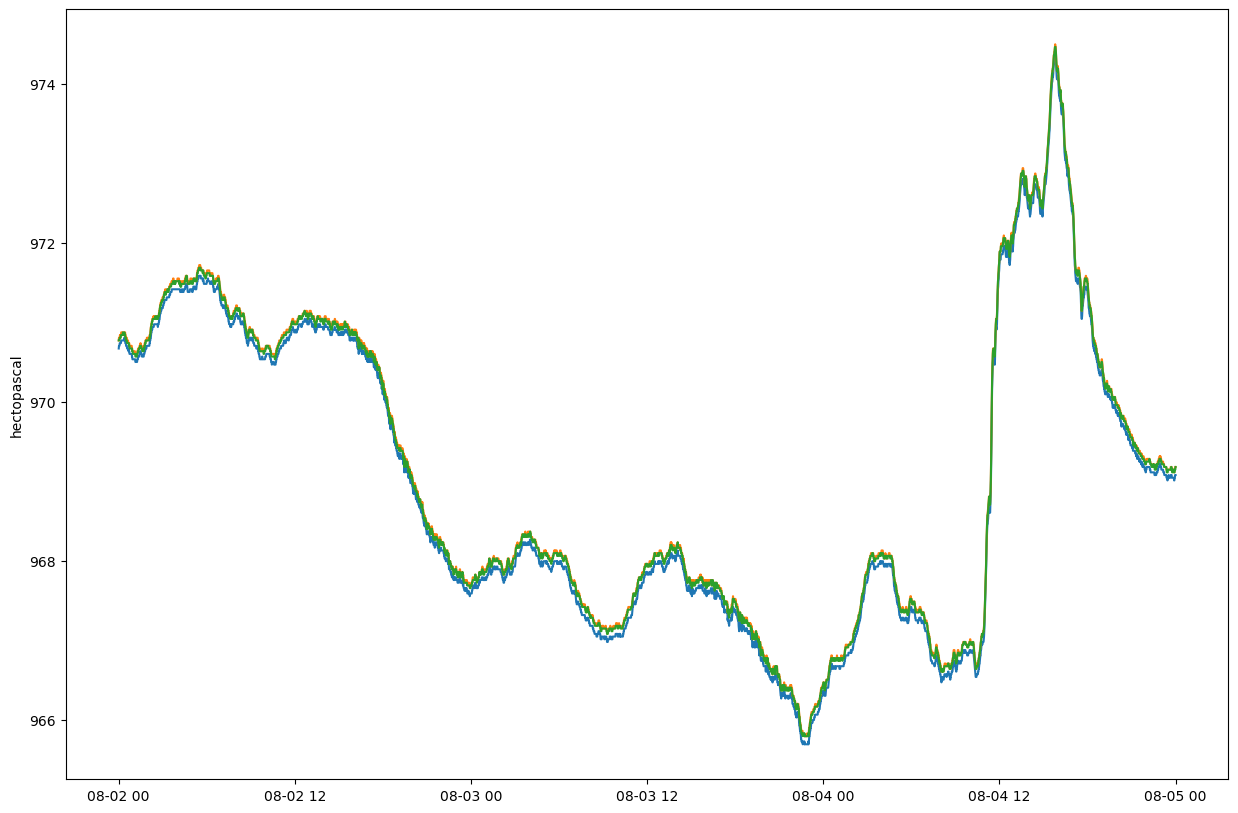

In [11]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(df['valid(UTC)'], df['pres1'].to('hPa'))
ax.plot(df['valid(UTC)'], df['pres2'].to('hPa'))
ax.plot(df['valid(UTC)'], df['pres3'].to('hPa'))
# ax.plot(df['valid(UTC)'], df['pressure'].to('hPa'), color = 'k', alpha = 0.5)

In [12]:
(0.04 * units('inHg')).to('hPa')

1.3545554561364 <Unit('hectopascal')>